In [3]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

from tensor_splines import SpiroBatch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some artificial curves

In [4]:
theta_in = torch.tensor([0.0, np.pi / 6, 0.0])
theta_out = torch.tensor([0.0, -np.pi / 6, np.pi / 3])
starts = torch.tensor([[0.0, 0.0],
                       [0.5, 1.5],
                       [2.3, -2.0]])
ends = starts + torch.tensor([10.0, 0.0])

In [5]:
spiros = SpiroBatch.make_euler_spiral(starts, ends, theta_in, theta_out)

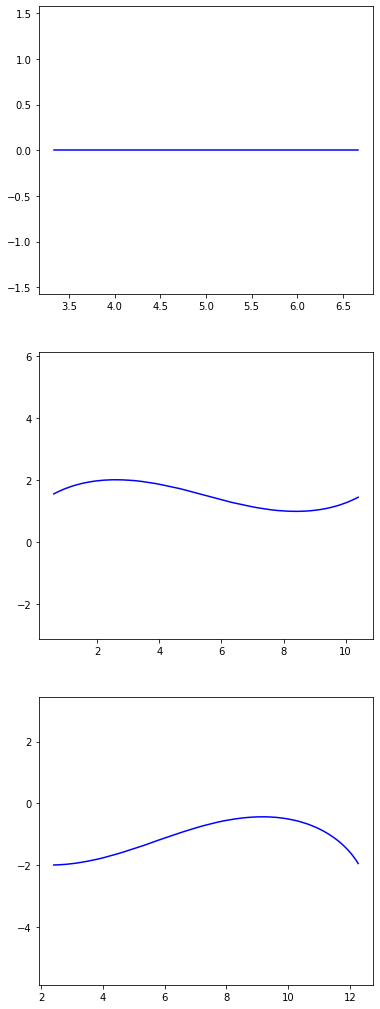

In [7]:
plt.rcParams['figure.figsize'] = [6, 18]

fig, axes = plt.subplots(3, 1)

for b in range(spiros.batch_shape[0]):
    axes[b].axis('equal')
    spiros.plot_single(b, axes[b])

## Curve from realistic driving

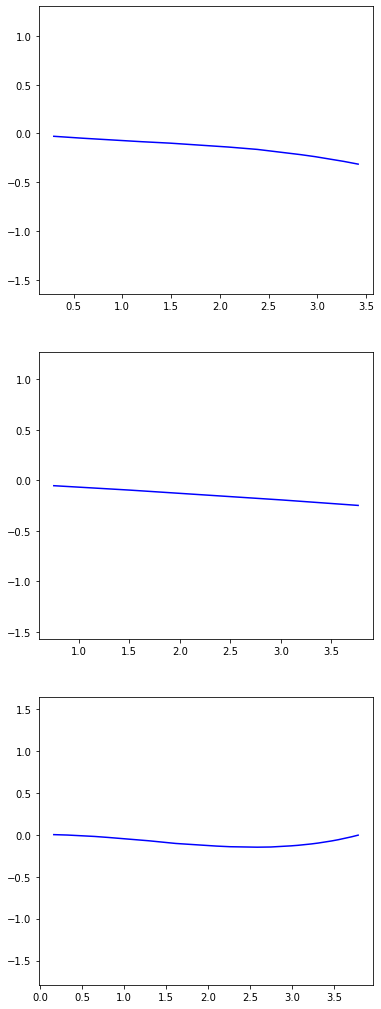

In [28]:
plt.rcParams['figure.figsize'] = [6, 18]

fig, axes = plt.subplots(3, 1)

ends = torch.tensor([[3.5654, -0.3470],
                     [4.5146, -0.3234],
                     [3.8681, 0.0170]])

theta_in = torch.tensor([0., 0., 0.])
theta_out = torch.tensor([-0.1220, -0.0273, 0.2765])

spiros = SpiroBatch.make_euler_spiral(torch.zeros_like(ends), ends, theta_in, theta_out)

for b in range(spiros.batch_shape[0]):
    axes[b].axis('equal')
    spiros.plot_single(b, axes[b])

## Curve by specifying lengths

tensor([0.9976, 1.0000, 0.9970], dtype=torch.float64)
tensor([[-0.9890,  0.1482],
        [-0.6536, -0.7568],
        [-0.5012, -0.8653]])


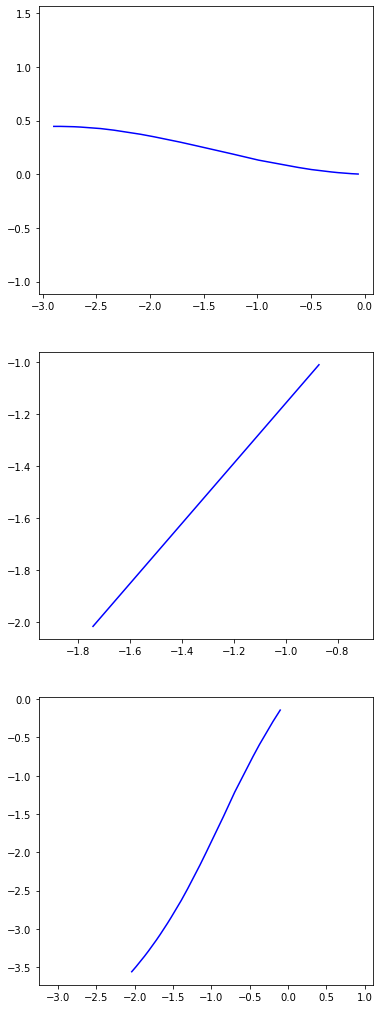

In [19]:
plt.rcParams['figure.figsize'] = [6, 18]

fig, axes = plt.subplots(3, 1)

chord_theta = torch.tensor([-0.1, 0.0, 0.1])
theta_in = torch.tensor([0.12, 0.0, -0.09])
average_curvature = torch.tensor([0.02, 0.0, -0.03])
lengths = torch.tensor([3.0, 4.0, 4.2]) 


spiros = SpiroBatch.make_euler_spiral_by_length(
    starts=torch.zeros(3, 2),
    chord_theta=chord_theta,
    theta_in=theta_in,
    average_curvature=average_curvature,
    lengths=lengths)

for b in range(spiros.batch_shape[0]):
    axes[b].axis('equal')
    spiros.plot_single(b, axes[b])